# Статистика, основной поток
## Практическое задание 3

В данном задании вы исследуете некоторые свойства доверительных интервалов и байесовских оценок.

**Правила:**

* Дедлайн **27 ноября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[base] Фамилия Имя - задание 3"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.



**Баллы за задание:**

* Задача 1 -  10 баллов
* Задача 2 -  5 баллов
* Задача 3 -  5 баллов
* Задача 4 -  5 баллов
* Задача 5 -  7 баллов
* Задача 6 -  7 баллов
* Задача 7 -  6 баллов

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import sqrt

sns.set()
warnings.filterwarnings("ignore")

%matplotlib inline

__________________
### Задача 1.
В этой задаче нужно сделать оценку максимального правдоподобия для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.
Скачайте данные по ссылке https://archive.ics.uci.edu/ml/datasets/wine и загрузите их с помощью библиотеки pandas.

In [2]:
columns = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
               'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                'OD280/OD315 of diluted wines', 'Proline']
wine = pd.read_csv('wine_dataset.txt', sep=',', names=columns)

Пусть выборка $X = (X_1, ..., X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со средним вектором $a \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.

Оценки максимального правдоподобия параметров $a$ и $\Sigma$ выглядят следующим образом
$$\widehat{a} = \frac{1}{n}\sum_{i=1}^n X_i,$$
$$\widehat{\Sigma} = \frac{1}{n} \sum_{i=1}^n \left(X_i - \widehat{a}\right) \left(X_i - \widehat{a}\right)^T.$$

Рассмотрим колонки "Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue".
Предположим, что данные в них образуют выборку из многомерного нормального распределения с неизвестными параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что данные визуально похожи на нормальное распределение:

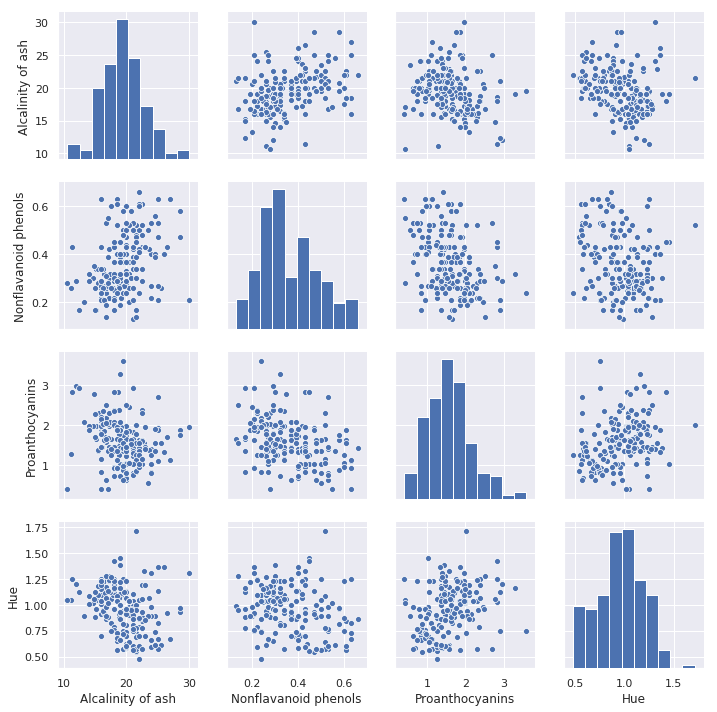

In [3]:
sns.pairplot(wine, vars=['Alcalinity of ash', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue'])

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $\mu$ и матрицы ковариаций $\Sigma$ по выборке:

In [4]:
sample = wine[['Alcalinity of ash', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue']]

In [5]:
def mle_for_mean(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    """
    return np.array(sample).sum(axis=0)/np.array(sample).shape[0]

In [6]:
def mle_for_covariance_matrix(sample):
    """
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    """
    a = mle_for_mean(sample)
    n = sample.shape[0]
    return np.array([np.array([x-a]).T @ np.array([x-a]) for x in np.array(sample)]).sum(axis=0)/n

In [7]:
mu = mle_for_mean(sample)
sigma = mle_for_covariance_matrix(sample)
colors = ['blue', 'red', 'green', 'yellow', 'purple', 'gray']
x_axis = ['Alcalinity of ash', 'Alcalinity of ash', 'Alcalinity of ash',
          'Nonflavanoid phenols', 'Nonflavanoid phenols', 'Proanthocyanins']
y_axis = ['Nonflavanoid phenols', 'Proanthocyanins', 'Hue', 'Proanthocyanins', 'Hue', 'Hue']

Визуализируйте полученный результат. Для каждой пары признаков постройте график, на котором будут:

1) Точки выборки.

2) Плотность нормального распредления с оцененными параметрами в виде линий уровня.

**hint:** используйте функции `plt.pcolormesh` и `plt.clabel`

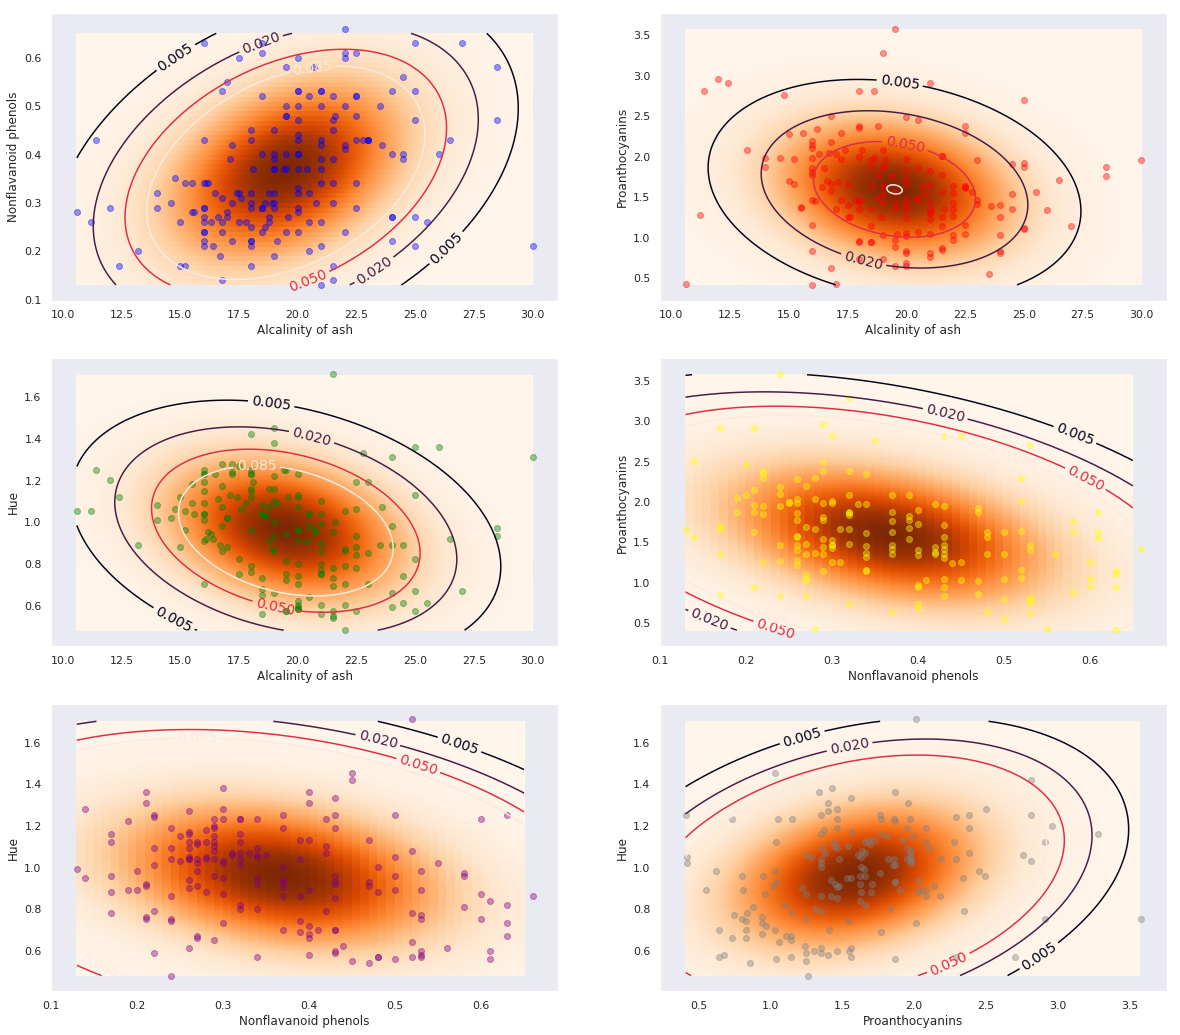

In [8]:
pairs = np.array([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]])
plt.figure(figsize=(20, 18))
for i in range(6):
    plt.subplot(3, 2, i+1)
    i1, i2 = pairs[i][0], pairs[i][1]
    cur_sample = np.array(wine[[x_axis[i], y_axis[i]]]).T
    xmin = np.min(cur_sample[0])
    xmax = np.max(cur_sample[0])
    ymin = np.min(cur_sample[1])
    ymax = np.max(cur_sample[1])
    grid = np.mgrid[xmin:xmax:0.01, ymin:ymax:0.01]
    #plt.scatter(cur_sample[0], cur_sample[1], alpha=0.2, color=colors[i])
    
    density = np.array([[sps.multivariate_normal.pdf((grid[0, j, k], grid[1, j, k]), mean=[mu[i1], mu[i2]],
                                                     cov=[[sigma[i1][i1], sigma[i1][i2]], [sigma[i2][i1], sigma[i2][i2]]])
                        for j in range(grid[0].shape[0])]for k in range(grid[0].shape[1])])
    plt.pcolormesh(grid[0], grid[1], density.T, cmap='Oranges')
    CS = plt.contour(grid[0], grid[1], density.T, [0.005, 0.02, 0.05, 0.085])
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
    plt.scatter(cur_sample[0], cur_sample[1], alpha=0.4, color=colors[i])
    plt.xlabel(x_axis[i])
    plt.ylabel(y_axis[i])

plt.show()

**Выводы:** 
Графики наглядно демонстрируют, что точки выборки, взятой согласно условию задачи, поддаются нормальному распределению с параметрами, близкими к полученным оценкам.

__________________
### Задача 2.
В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. 

Чтобы не плодить код, напишите следующую функцию (см. ниже). Пример построения есть в ноутбуке по `matplotlib`.

In [9]:
def draw_confidence_interval(
        left,  # левая граница интервала
        right,  # правая граница интервала
        estimation=None,  # если задана, то рисуется график оценки
        sample=None,  # если задано, то рисуются точки выборки
        ylim=(None, None)  # ограничение по оси y
    ):
    plt.figure(figsize=(15, 8))
    time = np.arange(1, 101)
    if sample is not None:
        plt.scatter(np.arange(1, len(sample) + 1), sample, alpha=0.2, s=40, label='sample')
        
    if estimation is not None:
        plt.plot(np.arange(1, len(estimation) + 1), estimation, color='r', label='estimation')
        
    plt.fill_between(time, right, left, alpha=0.25, label='confidence interval')
    plt.legend()
    
    if ylim is not None:
        plt.ylim(ylim)
    
    plt.xlim((0, 101))
    plt.grid()
    plt.show()

Рассмотрим следующие ситуации:

1. Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

2. Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в параметрической модели $U[0, \theta]$ на основе статистики $X_{(n)}$.

*Указание*. При построении интервалов учтите особенности распределения статистики, на основе которой строится интервал.

Для каждой ситуации из перечисленных выше сгенерируйте выборку $X_1, ... X_{100}$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок вида $X_1, ... X_i$, $1 \le i \le 100$.

Постройте графики зависимости верхних и нижних границ интервала от размера выборки, используя написанную функцию. Нужно нанести на график точки выборки.
Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.


Из семинаров известны следующие значения для доверительных интервалов для параметра $\theta$:


1) Для нормального распределения: $$(\overline{X} - \frac{z_{\frac{\gamma + 1}{2}}}{\sqrt{n}}, \overline{X} - \frac{z_{\frac{\gamma + 1}{2}}}{\sqrt{n}})$$

2) Для равномерного распределения: $$(X_{(n)}, \frac{X_{(n)}}{(1 - \gamma)^{\frac{1}{n}}})$$

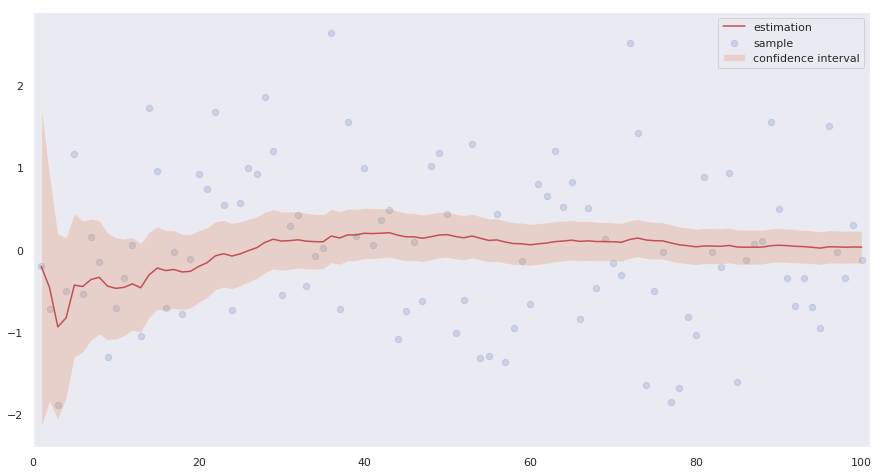

In [11]:
sample = sps.norm.rvs(size=100)
gamma = 0.95
mean = np.cumsum(sample)/np.arange(1, 101)
quant = sps.norm.ppf((1 + gamma)/2)
left = mean - quant/np.sqrt(np.arange(1, 101))
right = mean + quant/np.sqrt(np.arange(1, 101))
draw_confidence_interval(left, right, np.cumsum(sample)/np.arange(1, 101), sample)

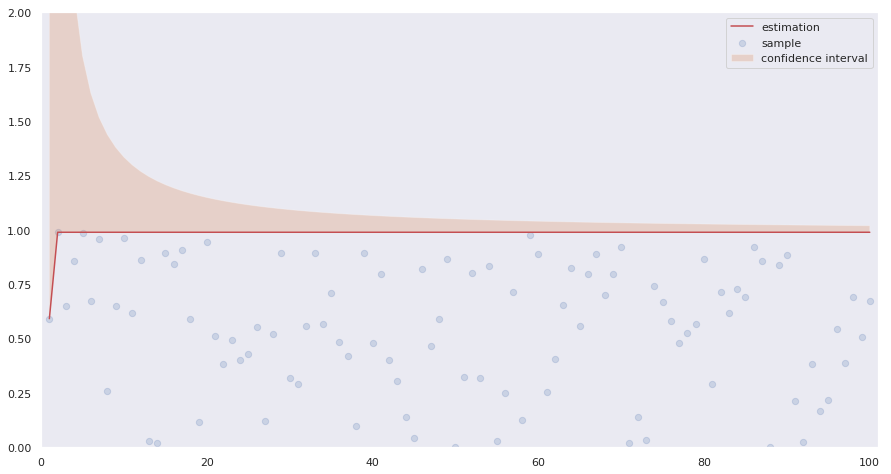

In [12]:
sample = sps.uniform.rvs(size=100)
max_arr = np.array(pd.Series(sample).cummax())
left = max_arr
right = max_arr/((1 - gamma)**(1 / np.arange(1, 101)))
draw_confidence_interval(left, right, max_arr, sample, (0, 2))

**Вывод:**
Из графиков можем заключить, что истинное значение параметра лежит в доверительном интервале, который уменьшается с увеличением размера выборки.

__________________
### Задача 3.
Аналогично задаче 1 сгенерируйте выборку $X_1, ... X_{100}$ из распределения $\Gamma(3, 2)$ и постройте доверительные интервалы для следующих случаев:

* точный асимптотический доверительный интервал в параметрической модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно;
* точный асимптотический доверительный интервал для $\theta$ в параметрической модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки наносить на график не нужно. 

В указанных случаях имеем следующие доверительные интервалы для $\theta$:

1) $\beta = 2$: $$(\frac{1}{\overline{X}} (2 - \frac{\sqrt{2} z_{\frac{1 + \gamma}{2}}}{\sqrt{n}}), \frac{1}{\overline{X}} (2 + \frac{\sqrt{2} z_{\frac{1 + \gamma}{2}}}{\sqrt{n}})$$

2) $\beta$ неизвестно: $$(\frac{\overline{X}}{s^2} (1 - z_{\frac{1 + \gamma}{2}} \sqrt{\frac{2 + \frac{3 s^2}{\overline{X}^2}}{n}}), \frac{\overline{X}}{s^2} (1 + z_{\frac{1 + \gamma}{2}} \sqrt{\frac{2 + \frac{3 s^2}{\overline{X}^2}}{n}}))$$

In [13]:
sample = sps.gamma(a=2, scale=1/3).rvs(size=100)
mean = np.cumsum(sample)/np.arange(1, 101)
quant = sps.gamma(a=2, scale=1/3).ppf((1 + gamma)/2)
left1 = (2 - quant*sqrt(2)/np.sqrt(np.arange(1, 101)))/mean
right1 = (2 + quant*sqrt(2)/np.sqrt(np.arange(1, 101)))/mean

sqr_mean = np.cumsum(sample**2)/np.arange(1, 101)
sqr_s = sqr_mean - mean**2
left2 = mean*(1 - quant*np.sqrt((2 + 3*sqr_s/sqr_mean)/np.arange(1, 101)))/sqr_s
right2 = mean*(1 + quant*np.sqrt((2 + 3*sqr_s/sqr_mean)/np.arange(1, 101)))/sqr_s    

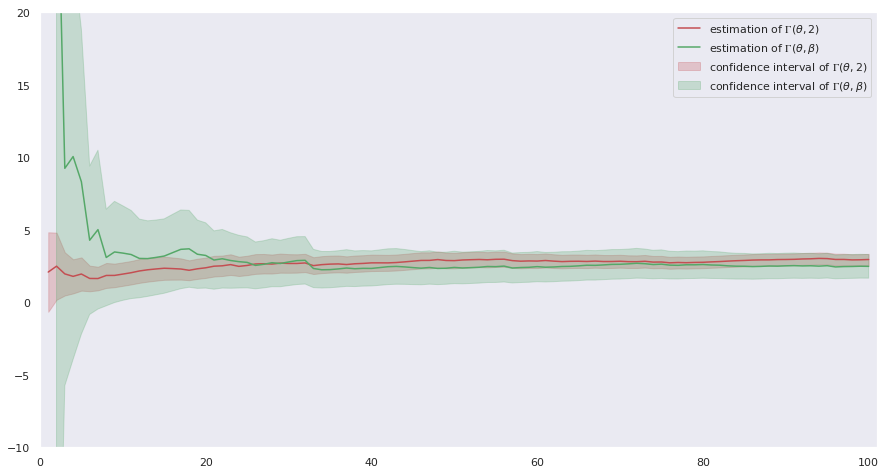

In [14]:
plt.figure(figsize=(15, 8))
time = np.arange(1, 101)

plt.plot(np.arange(1, len(2/mean) + 1), 2/mean, color='r', label='estimation of $\\mathcal{Г}(\\theta, 2)$')
plt.plot(np.arange(1, len(mean/sqr_s) + 1), mean/sqr_s, color='g', label='estimation of $\\mathcal{Г}(\\theta, \\beta)$')

plt.fill_between(time, right1, left1, alpha=0.25, color='r', label='confidence interval of $\\mathcal{Г}(\\theta, 2)$')
plt.fill_between(time, right2, left2, alpha=0.25, color='g', label='confidence interval of $\\mathcal{Г}(\\theta, \\beta)$')

plt.legend()
plt.ylim((-10, 20))
plt.xlim((0, 101))
plt.grid()
plt.show()

Сравните полученные интервалы.

**Вывод:**
Истинное значение параметра в обоих случаях лежит в доверительном интервале, но в случае, когда параметр $\beta$ известен, интервал уже, так как мы имеем более точное представление о распределении.

__________________
### Задача 4.
Аналогично задаче 1 сгенерируйте выборку $X_1, ... X_{100}$ из стандартного распределения Коши и постройте доверительные интервалы для следующих случаев

* точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$;
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя выборочную медиану.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 

В этой задаче исходя из полученных ранее результатов для данных распределений знаем следующие доверительные интервалы:


1) Для $\theta$ в $\mathcal{N}(\theta, 1)$: $$(\overline{X} - \frac{z_{\frac{1 + \gamma}{2}}}{\sqrt{n}}, \overline{X} + \frac{z_{\frac{1 + \gamma}{2}}}{\sqrt{n}})$$

2) Для $\theta$ в $\mathcal{Cauchy}(\theta)$: $$(\hat{\mu} - \frac{\pi z_{\frac{1 + \gamma}{2}}}{2 \sqrt{n}}, \hat{\mu} + \frac{\pi z_{\frac{1 + \gamma}{2}}}{2 \sqrt{n}})$$

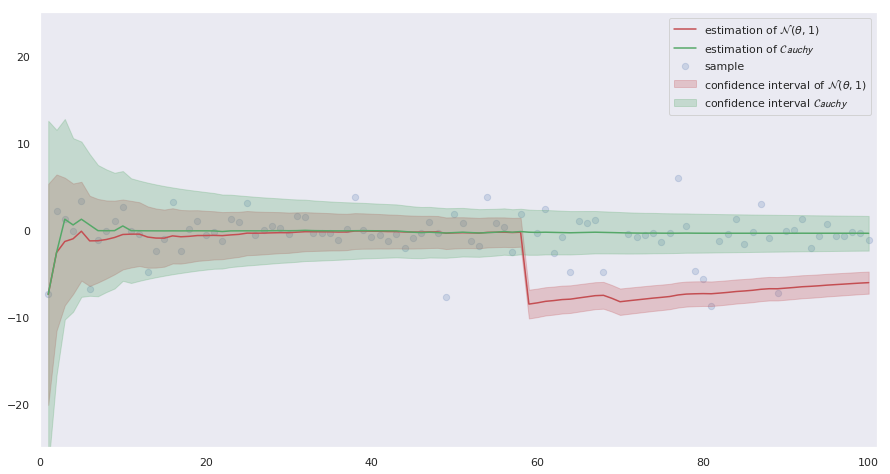

In [15]:
sample = sps.cauchy.rvs(size=100)
time = np.arange(1, 101)
quant = sps.cauchy.ppf((1+gamma)/2)
mean = np.cumsum(sample)/np.arange(1, 101)
left1 = mean - quant/np.sqrt(np.arange(1, 101))
right1 = mean + quant/np.sqrt(np.arange(1, 101))

median = [np.median(sample[:i]) for i in range(1, 101)]
left2 = median - np.pi*quant/(2*np.sqrt(np.arange(1, 101)))
right2 = median + np.pi*quant/(2*np.sqrt(np.arange(1, 101)))

plt.figure(figsize=(15,8))
plt.scatter(np.arange(1, 101), sample, alpha=0.2, s=40, label='sample')

plt.plot(np.arange(1, len(mean) + 1), mean, color='r', label='estimation of $\\mathcal{N}(\\theta, 1)$')
plt.plot(np.arange(1, len(median) + 1), median, color='g', label='estimation of $\\mathcal{Cauchy}$')

plt.fill_between(time, right1, left1, color='r', alpha=0.25, label='confidence interval of $\\mathcal{N}(\\theta, 1)$')
plt.fill_between(time, right2, left2, color='g', alpha=0.25, label='confidence interval $\\mathcal{Cauchy}$')

plt.legend()
plt.ylim((-25, 25))
plt.xlim((0, 101))
plt.grid()
plt.show()

Сравните полученные интервалы.

**Вывод:**
В случае нормального распределения подсчет доверительного интервала дает худший результат, так как выборка из распределения Коши, а параметрическую модель берем нормального распределения. В случае модели распределения Коши получаем хороший доверительный интервал, в котором лежит истинное значение.

__________________
### Задача 5.
 Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, \sigma^2)$, а параметр $\theta$ в качестве априорного распределения имеет стандартное распределение Коши со сдвигом. 

Апостериорное распределение вычисляется по формуле:
$$q\left.(t\,\right|\,x) = \frac {q(t) p_t(x_1) ... p_t(x_n)} {\int\limits_\Theta q(t) p_t(x_1) ... p_t(x_n) dt},$$ 
где $p_t(x)$ --- плотность распределения $\mathcal{N}(t, \sigma^2)$, а $q(t)$ --- плотность распределения Коши.
Как было сказано на лекции, аналитически интеграл в знаменателе посчитать не удастся. Однако, этот интеграл можно вычислить численно, например, с помощью метода Монте-Карло.

В данном случае, интеграл $\int\limits_{\mathbb{R}} f(x) p(x) dx$, где $p(x)$ -- некоторая плотность, можно оценить как  $\frac{1}{k}\sum\limits_{j=1}^k f(\xi_i)$, где $\xi_1, ..., \xi_k$ -- сгенерированная выборка из распределения, имеющего плотность $p(x)$.


Рассмотрим столбец `Alcalinity of ash` датасета <a href="http://archive.ics.uci.edu/ml/datasets/Wine">о вине</a>. 

Для выборки, образованной эти столбцом посчитайте $c$ -- знаменатель в формуле Байеса. Параметры априорного распределения выберите некоторым разумном способом, не опираясь на данные. Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$?


In [ ]:
sample = wine['Alcalinity of ash']

Для апостериорного распределения:
- Нарисуйте график плотности;
- Посчитайте математическое ожидание;
- Найдите симметричный 95%-ый доверительный интервал.

In [ ]:
<...>

**Вывод:** <...>

__________________
### Задача 6.
 Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

Постройте несколько графиков сопряженного распределения для разных параметров и охарактеризуйте, как его значения параметров соотносятся с априорными знаниями о монете.
Это могут быть, например, знания вида 
* монета скорее честная (при таком априорном распределении наиболее вероятны значения $p$ в окрестности 0.5);
* монета скорее нечестная, перевес неизвестен (наименее вероятны значения $p$ в окрестности 0.5);
* монета скорее нечестная, перевес в сторону герба (наиболее вероятны значения $p$ в окрестности 1);
* монета скорее честная, либо с небольшим перекосом вправо (наиболее вероятны значения $p$ в окрестности ~0.6);
* ничего не известно (все значения равновероятны).

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

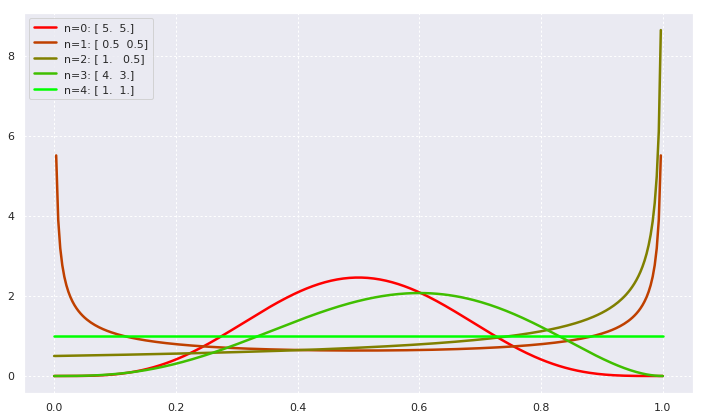

In [17]:
sample = np.linspace(0, 1, 300)
cases = np.array([[5, 5], [0.5, 0.5], [1, 0.5], [4, 3], [1, 1]])
draw_posteriori(sample, sps.beta, cases)

**Вывод:**
Сравнивая протности распределения Бернулли ($p^{\sum_{1}^{n} X_i} (1 - p)^{1 - \sum_{1}^{n} X_i}$) и, сопряженного к нему Бета-распределения ($\frac{x^{\alpha - 1}(1 - x)^{\beta - 1}}{\mathcal{B}(\alpha, \beta)}$) можем соотнести параметры $p$ и $x$, а значит $\alpha$ отвечает за число успехов в эксперименте, а $\beta$ за число неудач. График это демонстрирует.

In [16]:
def draw_posteriori(grid, distr_class, post_params, xlim=None):
    ''' Рисует серию графиков апостериорных плотностей.
        grid --- сетка для построения графика
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = post_params.shape[0] - 1
    
    plt.figure(figsize=(12, 7))
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) \
                     if np.isscalar(post_params[n]) \
                     else distr_class(*post_params[n]).pdf(grid), 
                 label='n={}: {}'.format(n, post_params[n]), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    plt.grid(ls=':')
    plt.legend()
    plt.xlim(xlim)
    plt.show()
    

def draw_estimations(ml, distr_class, post_params, confint=True, ylim=None):
    ''' Рисует графики байесовской оценки (м.о. и дов. инт.) и ОМП.
        ml --- Оценка максимального правдоподобия для 1 <= n <= len(sample)
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) \
                          if np.isscalar(post_params[n]) \
                          else distr_class(*post_params[n]))
    
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], 
             label='Bayes', lw=1.5)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.1)
    plt.plot(np.arange(size)+1, ml, label='MLE', lw=1.5)
    plt.grid(ls=':')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

Реализуйте следующую функцию

Сопряженное распределение к распределению Бернулли - Бета-распеделение. Параметры апостериорного распределения через параметры априорного $(\alpha, \beta)$ задаются как $$(\sum_{1}^{n} X_i + \alpha, n + \beta - \sum_{1}^{n} X_i)$$

In [18]:
def bern_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения 
        для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    
    params = np.zeros(shape=(len(sample)+1, 2))
    for i in range(len(sample) + 1):
        params[i][0] = np.sum(sample[:i]) + a
        params[i][1] = i - np.sum(sample[:i]) + b
    
    return params

Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая --- параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

In [19]:
symm = sps.bernoulli(p=0.5).rvs(size=15)
asymm = sps.bernoulli(p=0.3).rvs(size=15)
sym_likelyhood = np.cumsum(symm) / np.arange(1, 16)
asym_likelyhood = np.cumsum(asymm) / np.arange(1, 16)

**Симметричная монета, правильные параметры:**

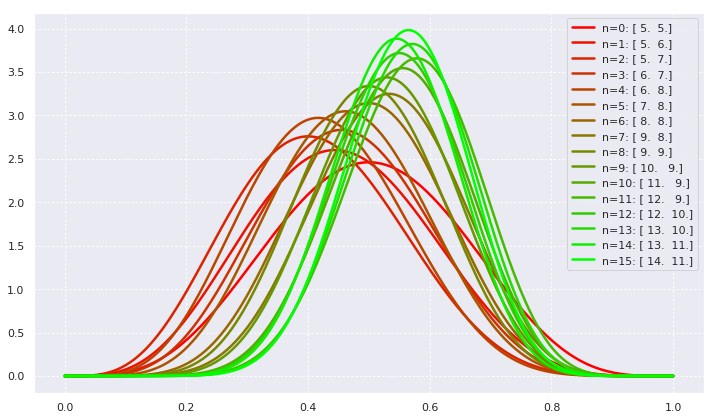

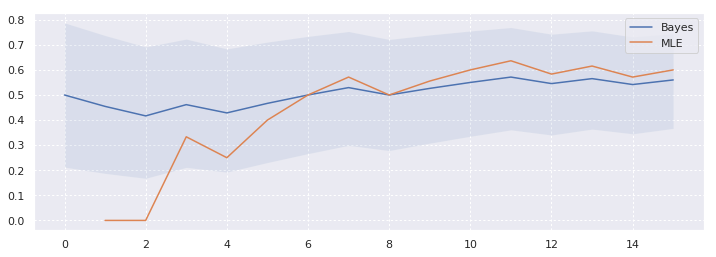

In [20]:
right_params = bern_posterior_params(symm, 5, 5)
draw_posteriori(sample, sps.beta, right_params)
draw_estimations(sym_likelyhood, sps.beta, right_params)

**Несимметричная монета, правильные параметры:**

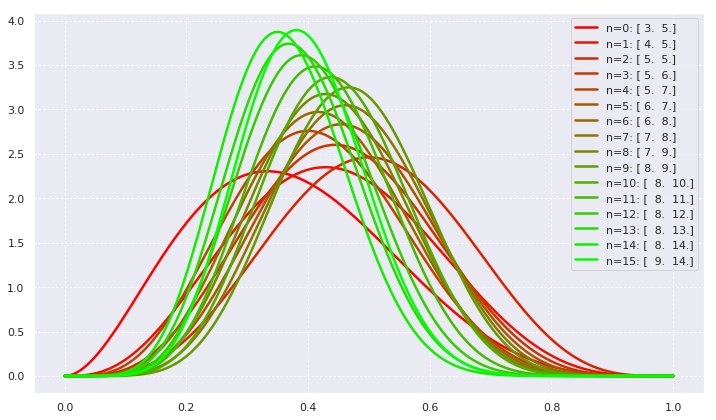

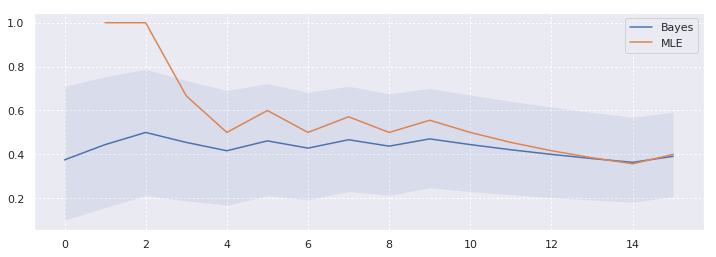

In [21]:
right_params = bern_posterior_params(asymm, 3, 5)
draw_posteriori(sample, sps.beta, right_params)
draw_estimations(asym_likelyhood, sps.beta, right_params)

**Симметричная монета, неправильные параметры:**

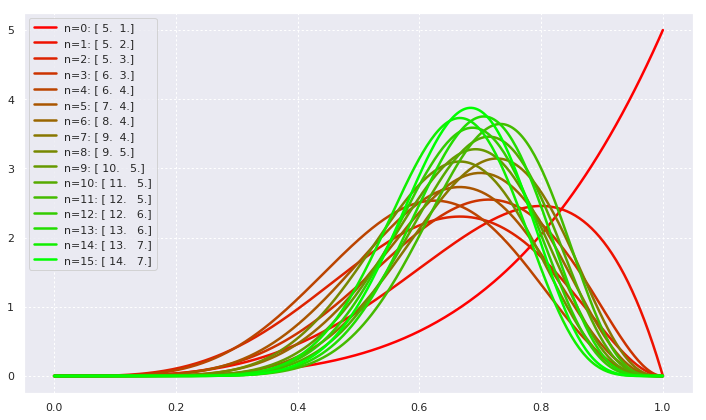

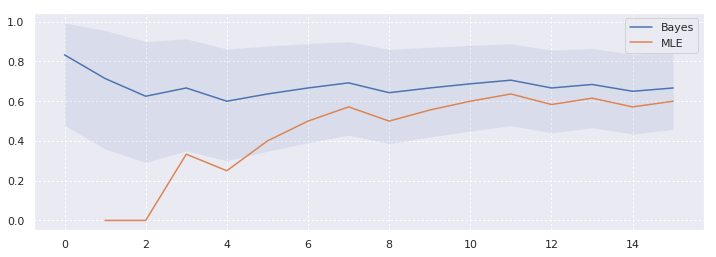

In [22]:
wrong_params = bern_posterior_params(symm, 5, 1)
draw_posteriori(sample, sps.beta, wrong_params)
draw_estimations(sym_likelyhood, sps.beta, wrong_params)

**Несимметричная монета, неправильные параметры:**

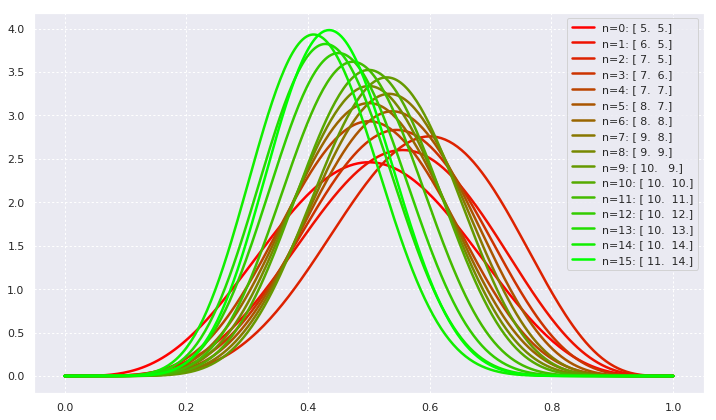

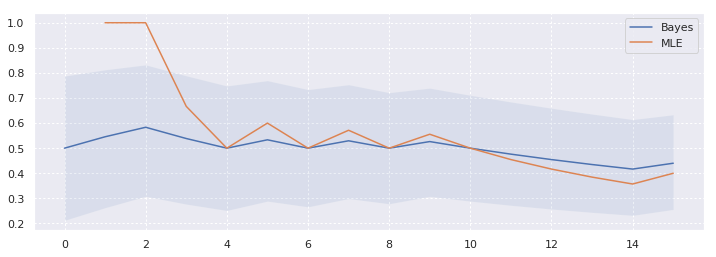

In [23]:
wrong_params = bern_posterior_params(asymm, 5, 5)
draw_posteriori(sample, sps.beta, wrong_params)
draw_estimations(asym_likelyhood, sps.beta, wrong_params)

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия.

**Вывод:**
При правильно подобранных параметрах в обоих случаях графики плотностей строятся близко к истинному значению параметра начиная с иалого размера выборки, а при неправильных параметрах разброс графиков при малых значениях выборки больше. Также из вторых графиков заключаем что при маленьких объемах выборки оценки сильно различаются, а ОМП в этом случае плохо приближает параметр(выходит за границы доверительного интервала). Байесовская оценка же всегда лежит в границах доверительного интервала, а значит, лучше аппроксимирует параметр.

__________________
### Задача 7.
 Проведите исследование, аналогичное задаче 6 для выборок из распределений
* $\mathcal{N}(\theta, 1)$

Сопряженное к нормальному распределению с известной дисперсией $\sigma^2$ - нормальное. Его параметры задаются через параметры априорного распределения $(\mu_0, \sigma_0^2)$ как $$(\frac{\mu_0 + \sum_{1}^{n} X_i}{1 + n \sigma_0^2}, \frac{\sigma_0^2}{1 + n \sigma_0^2})$$

In [24]:
def norm_posterior_params(sample, mu0, sigma0):
    ''' Возвращает параметры апостериорного распределения 
        для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    
    params = np.zeros(shape=(len(sample)+1, 2))
    for i in range(len(sample) + 1):
        params[i][0] = (mu0 + np.sum(sample[:i]))/(1 + i*sigma0)
        params[i][1] = sigma0/(1 + i*sigma0)
    
    return params

In [25]:
grid=np.linspace(-3, 3, 300)
sample= sps.norm.rvs(size=15)
likelyhood = np.cumsum(sample)/ np.arange(1, 16)


**Правильно подобранные параметры:**

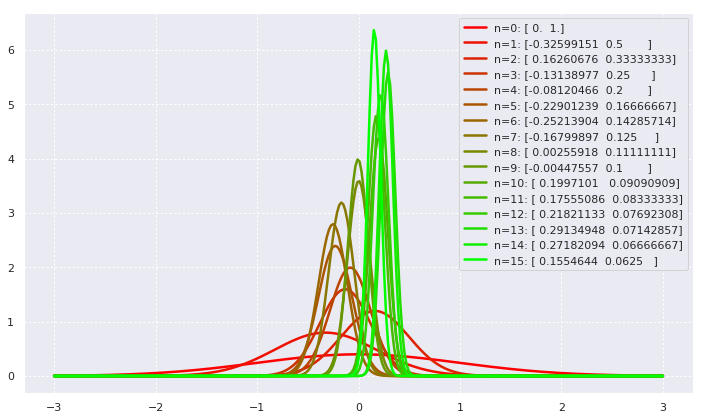

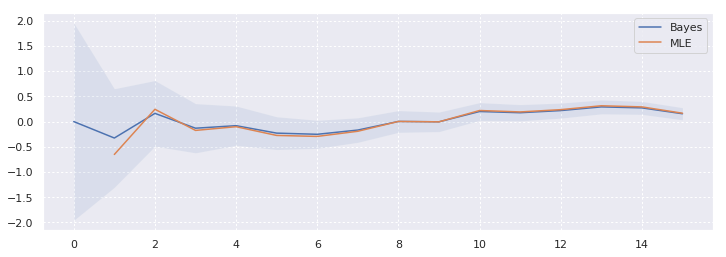

In [26]:
right_params = norm_posterior_params(sample, 0, 1)
draw_posteriori(grid, sps.norm, right_params)
draw_estimations(likelyhood, sps.norm, right_params)

**Неправильно подобранные параметры:**

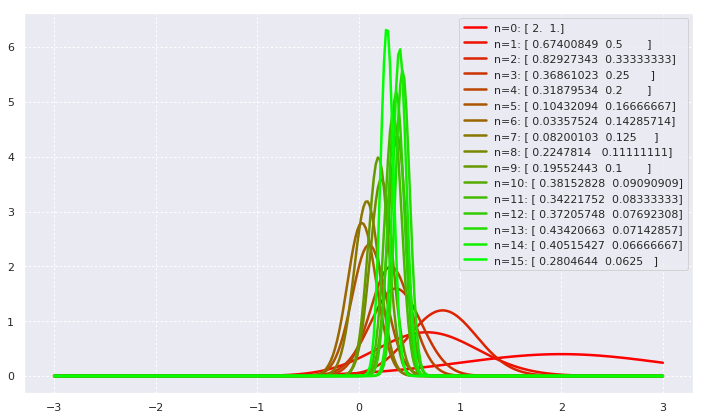

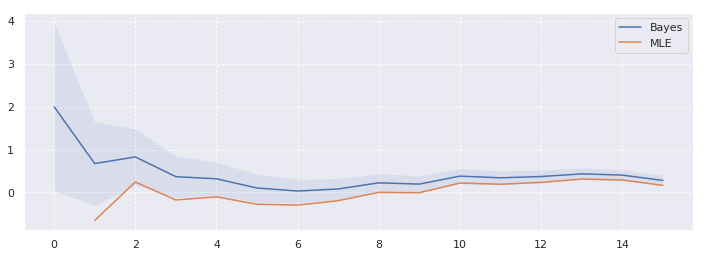

In [27]:
wrong_params = norm_posterior_params(sample, 2, 1)
draw_posteriori(grid, sps.norm, wrong_params)
draw_estimations(likelyhood, sps.norm, wrong_params)

* $Exp(\theta)$

Сопряженное к экспоненциальному - гамма-распределение. Через параметры ($\alpha, \beta$) Гамма-распределения параметры апостериорного распределения задаются как $$(\beta + n, \frac{1}{\sum_{1}^{n} X_i + \alpha})$$

In [28]:
def exp_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения 
        для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    
    params = np.zeros(shape=(len(sample)+1, 3))
    for i in range(len(sample) + 1):
        params[i][0] = i + b
        params[i][1] = 0
        params[i][2] = 1/(np.sum(sample[:i]) + a)
    
    return params

In [29]:
grid=np.linspace(0, 8, 300)
sample= sps.expon.rvs(size=15)
likelyhood = 1 /(np.cumsum(sample)/ np.arange(1, 16))

**Правильно подобранные параметры:**

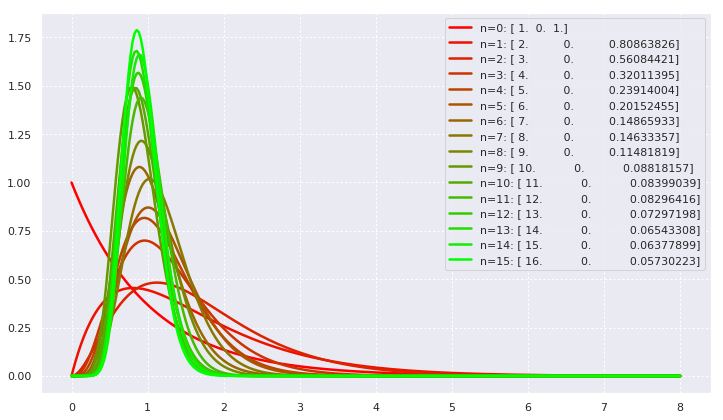

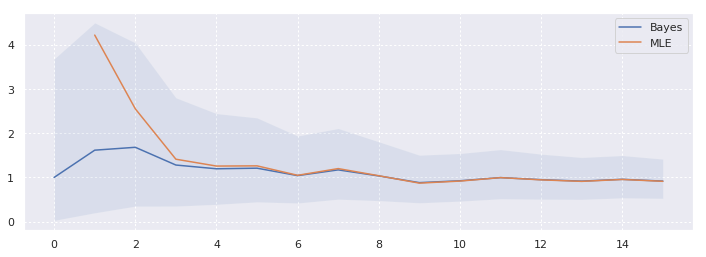

In [30]:
right_params = exp_posterior_params(sample, 1, 1)
draw_posteriori(grid, sps.gamma, right_params)
draw_estimations(likelyhood, sps.gamma, right_params)

**Неправильно подобранные параметры:**

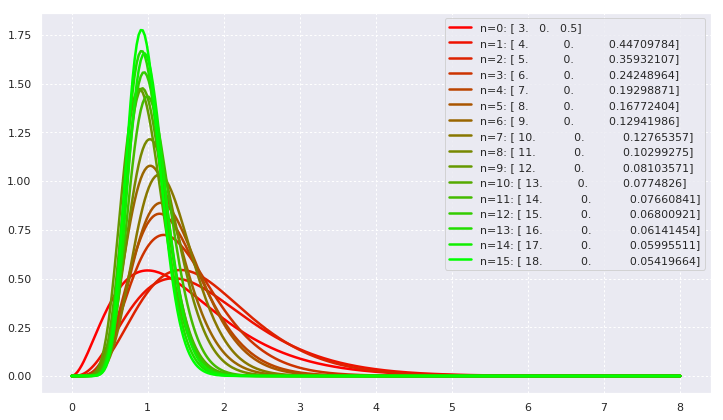

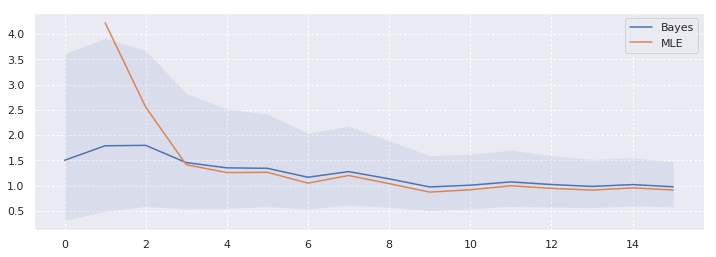

In [31]:
wrong_params = exp_posterior_params(sample, 2, 3)
draw_posteriori(grid, sps.gamma, wrong_params)
draw_estimations(likelyhood, sps.gamma, wrong_params)

**Вывод:**
Для графиков плотностей вывод аналогичен задаче 6.
Про различия оценок в данном случае можно сказать, что при правильно подобранных параметрах они в обоих случаях хорошо совпадают, а при неправильно подобранных параметрах сильно различаются только при маленьких размерах выборки.